<a href="https://colab.research.google.com/github/ksyusuf/Melbourne-Housing-Market-ML/blob/main/Akbank_Melbourne_housing_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ilgili kütüphaneler projeye dahil edilir.
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# verileri okudum ve göz gezdirdim.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Melbourne_housing_FULL.csv")
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# verisetinin şekli ve boyutu
# Veri setinin şekli (shape)
shape = df_copy.shape
print(f'Shape of the dataset: {shape}')

# Sütun sayısı
num_columns = len(df_copy.columns)
print(f'Number of columns in the dataset: {num_columns}')

# Veri setinin boyutu (size)
size = df_copy.size
print(f'Size of the dataset: {size}')

Shape of the dataset: (34857, 21)
Number of columns in the dataset: 21
Size of the dataset: 731997


In [5]:
# Sütun sayısı, sütun etiketleri, sütun veri türleri,
# bellek kullanımı, aralık dizini,
# her bir sütundaki hücre sayısını (boş olmayan değerler) içeren veri kümesi bilgileri
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

**5. KEŞİFSEL VERİ ANALİZİ**

In [6]:
# tanımlayıcı istatistikler
df_copy.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [7]:
# tekrarlanan verilerin temizlenmesi
# Tekrarlanan satırları bul
temizlenecek_tekrar = df_copy[df_copy.duplicated(keep=False)]

# Tekrarlanan satırları temizle ve orijinal DataFrame'i güncelle
df_copy = df_copy.drop_duplicates()

# Temizlenmiş DataFrame'i yazdır
print("Temizlenen veri:")
print(df_copy)

Temizlenen veri:
           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  

Aykırı değerlerin görüntülenmesi

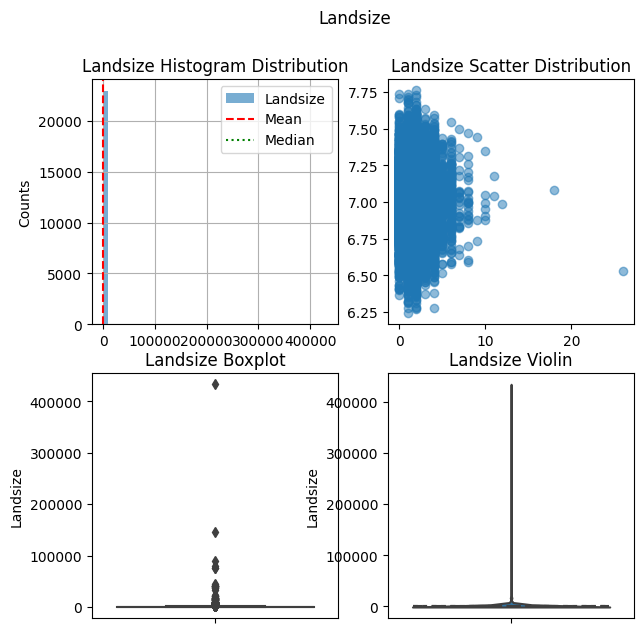

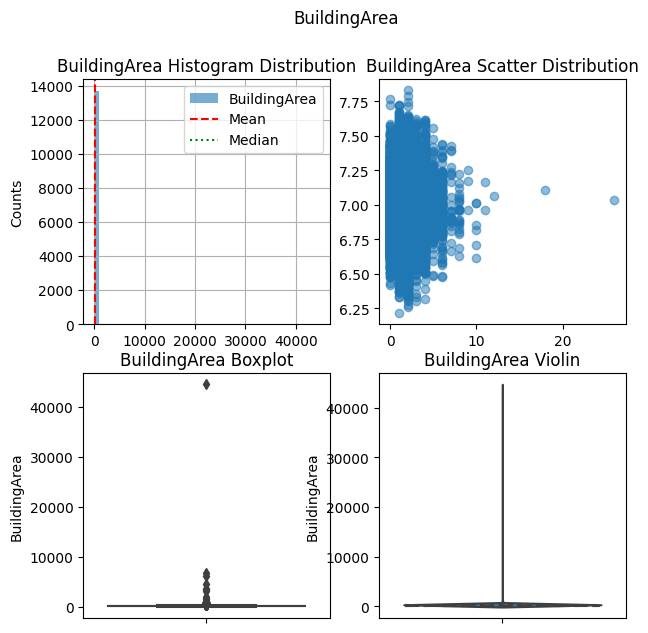

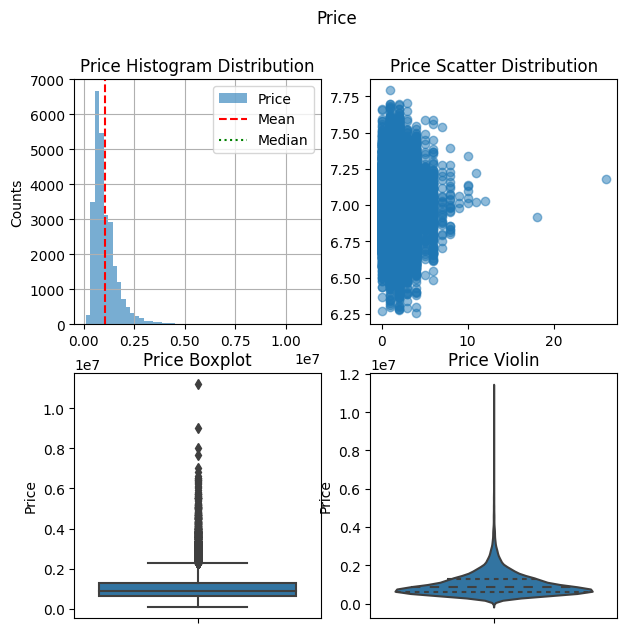

In [8]:
# aykırı değerleri görüntüleyelim (landsize buildingarea ve price için)
def aykiri_gosterici(degisken):
  plt.figure(figsize=(7, 7))
  degisken = degisken
  plt.suptitle(degisken)
  plt.subplot(2, 2, 1)
  df_copy[degisken].hist(bins=50, label=degisken, alpha=0.6)
  plt.axvline(np.mean(df_copy[degisken]), ls='--', c='r', label="Mean")
  plt.axvline(np.median(df_copy[degisken]), ls=':', c='g', label="Median")
  plt.ylabel("Counts")
  plt.title(f"{degisken} Histogram Distribution")
  plt.legend()

  plt.subplot(2, 2, 2)
  plt.scatter(df_copy['Car'], np.random.normal(7, 0.2, size=df_copy.shape[0]), alpha=0.5)
  plt.title(f"{degisken} Scatter Distribution")

  plt.subplot(2, 2, 3)
  sns.boxplot(y=degisken, data=df_copy)
  plt.title(f"{degisken} Boxplot")

  plt.subplot(2, 2, 4)
  sns.violinplot(y=degisken, data=df_copy, inner="quartile", bw=0.2)
  plt.title(f"{degisken} Violin")

  plt.show()

aykiri_gosterici("Landsize")
aykiri_gosterici("BuildingArea")
aykiri_gosterici("Price")

aykırı değerlerin z-score yöntemi ile temizlenmesi

In [9]:
def z_score_outliers(dataframe, threshold=3):
    # Veri setindeki her sütun için Z-score hesapla
    for col in dataframe.columns:
        if dataframe[col].dtype in ['int64', 'float64']:
            mean = dataframe[col].mean()
            std = dataframe[col].std()

            # Z-score hesaplama
            dataframe[col+'_z_score'] = (dataframe[col] - mean) / std

            # Aykırı değerleri işaretleme
            dataframe[col+'_outlier'] = np.abs(dataframe[col+'_z_score']) > threshold

            # Aykırı değerleri temizleme
            dataframe.loc[dataframe[col+'_outlier'], col] = np.nan

            # İşaretçi sütunları temizleme
            dataframe.drop([col+'_z_score', col+'_outlier'], axis=1, inplace=True)

    return dataframe

# Veri setindeki tüm sütunlardaki aykırı değerleri temizle
df_copy = z_score_outliers(df_copy)

aykırı verilerden temizlenmiş yeni grafikler

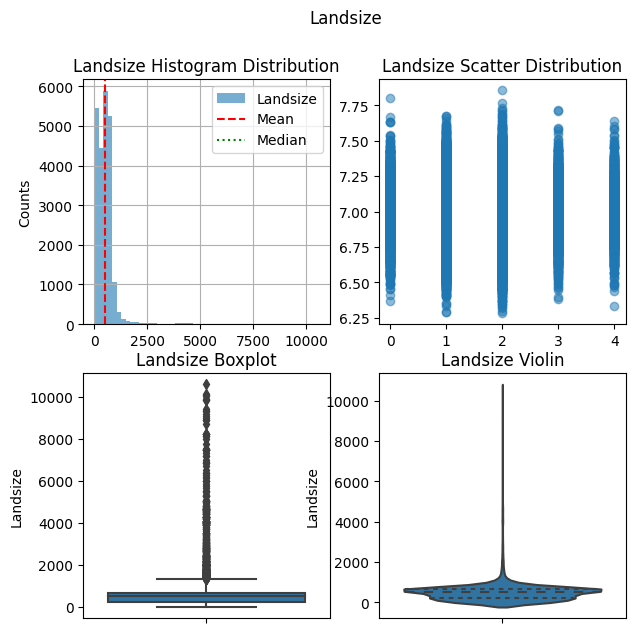

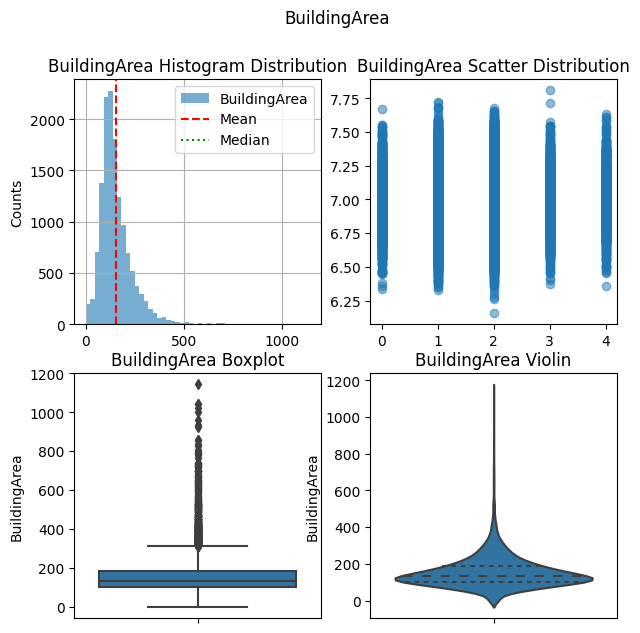

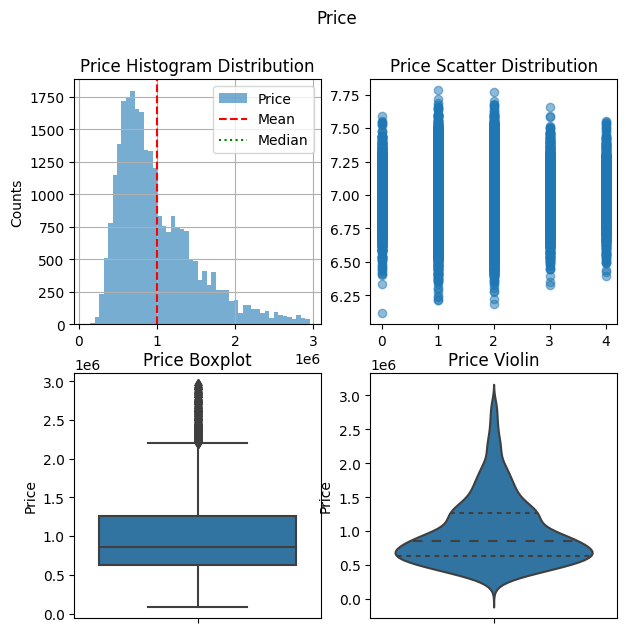

In [10]:
aykiri_gosterici("Landsize")
aykiri_gosterici("BuildingArea")
aykiri_gosterici("Price")

aykırı değerler varken ve yokken boxplot

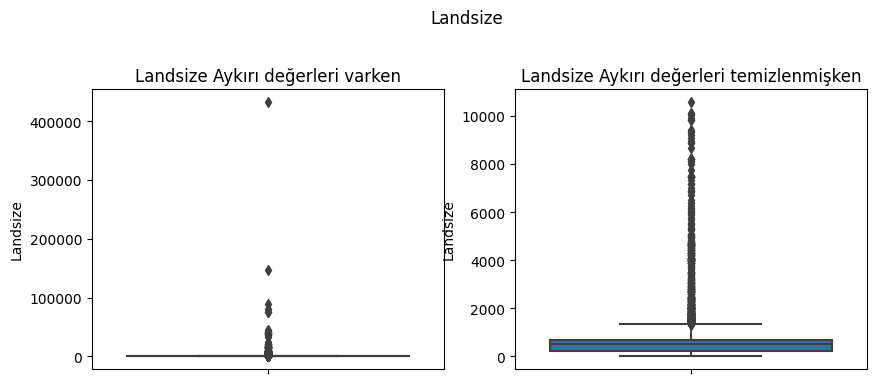

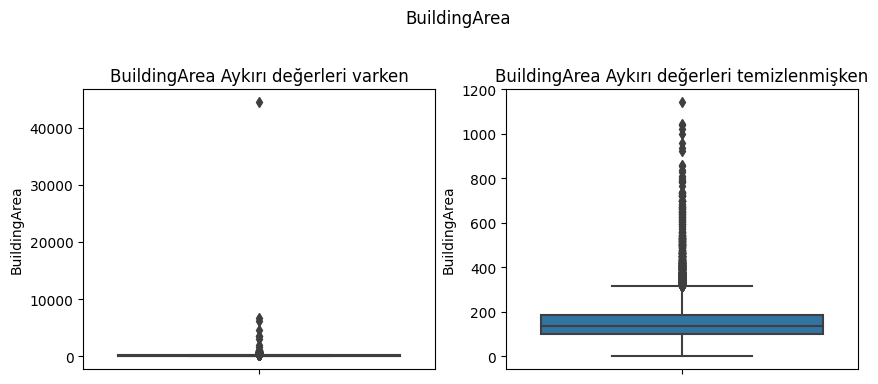

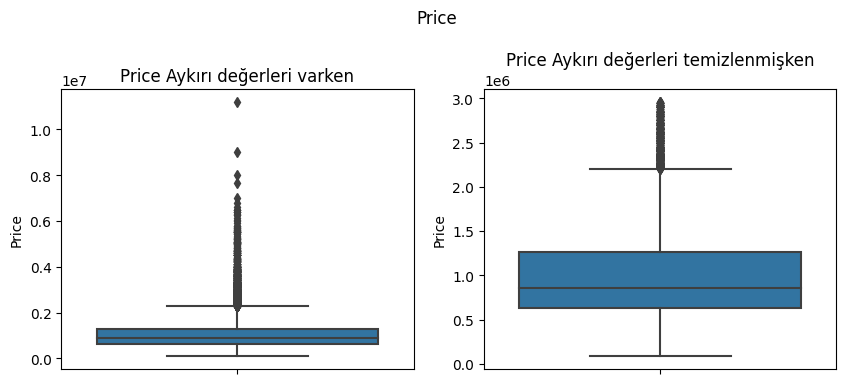

In [11]:
def aykiri_kiyas(degisken):
  plt.figure(figsize=(10, 8))
  plt.suptitle(degisken)
  degisken = degisken
  plt.subplot(2, 2, 1)
  sns.boxplot(y=degisken, data=df)
  plt.title(f"{degisken} Aykırı değerleri varken");

  plt.subplot(2, 2, 2)
  sns.boxplot(y=degisken, data=df_copy)
  plt.title(f"{degisken} Aykırı değerleri temizlenmişken");

aykiri_kiyas("Landsize")
aykiri_kiyas("BuildingArea")
aykiri_kiyas("Price")

eksik değerlerin bulunması

In [12]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms              269
Type                 0
Price             8083
Method               0
SellerG              0
Date                 0
Distance           793
Postcode           559
Bedroom2          8290
Bathroom          8597
Car               9081
Landsize         11853
BuildingArea     21124
YearBuilt        19315
CouncilArea          3
Lattitude         8300
Longtitude        8291
Regionname           3
Propertycount      847
dtype: int64

boşlukların mode() yöntemi ile doldurulması

In [13]:
# kategorik ve nümerik kolonları listeledik.
cat_cols = []
num_cols = []
for item, item2 in zip(df.nunique(), df.columns):
    if item >= 20:
        num_cols.append(item2)
    else:
        cat_cols.append(item2)

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

# string ve number veri içeren kolonların isimlerini alacağız.

def get_string_columns(dataframe):
    string_columns = dataframe.select_dtypes(include=['object']).columns.tolist()
    return string_columns

string_columns_list = get_string_columns(df_copy)

def get_numeric_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()
    return numeric_columns

numeric_columns_list = get_numeric_columns(df_copy)

# Sonucu görüntüleyin
print("string coluumns:", string_columns_list)
print("numeric columns:", numeric_columns_list)

Categorical Columns: ['Rooms', 'Type', 'Method', 'Bedroom2', 'Bathroom', 'Car', 'Regionname']
Numerical Columns: ['Suburb', 'Address', 'Price', 'SellerG', 'Date', 'Distance', 'Postcode', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount']
string coluumns: ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
numeric columns: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [14]:
# dokümanın verdiği ipucunu kullandık.
# fakat tüm verilerimin dolu olması gerekmez mi?

# kategorik verileri mod ile dolduruyoruz
for column in cat_cols:
  df_copy[column] = df_copy[column].fillna(df_copy[column].mode().iloc[0])

# # sayısal verilere ise medyan uyguluyoruz
# for column in numeric_columns_list:
#     df_copy[column] = df_copy[column].fillna(df_copy[column].median())
# içerisinde string veriler de olduğundan median ile dolduramadık. şimdilik pas.
# normalde string ifade içermemeliydi.

# geriye kalan eksik verileri silmeyi tercih ediyoruz.
df_copy.dropna(axis=0, inplace=True)

df_copy.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Veri Görselleştirme

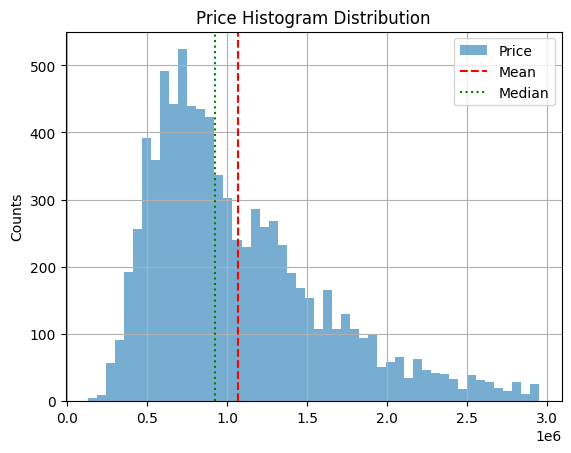

In [15]:
# fiyat histogramı
df_copy["Price"].hist(bins=50, label="Price", alpha=0.6)
plt.axvline(np.mean(df_copy["Price"]), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy["Price"]), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Price Histogram Distribution");
plt.legend()

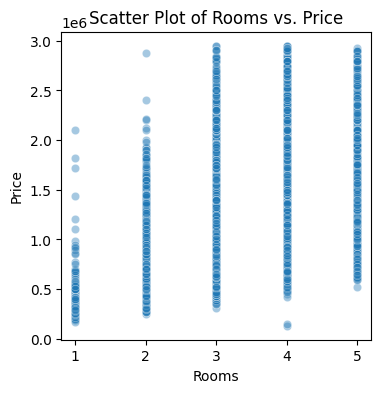

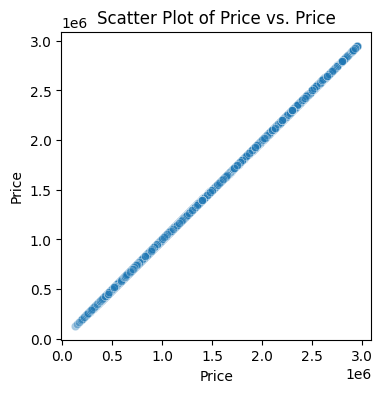

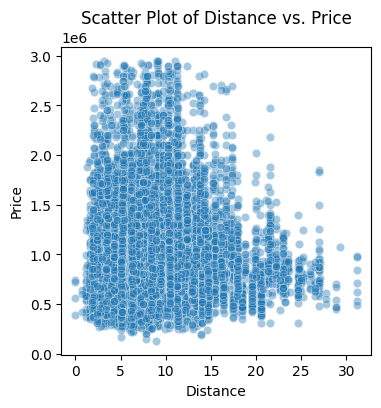

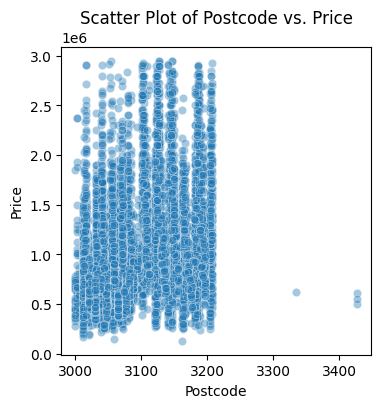

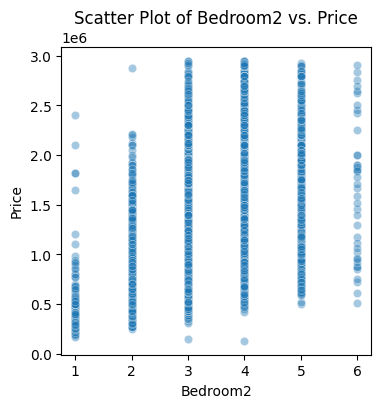

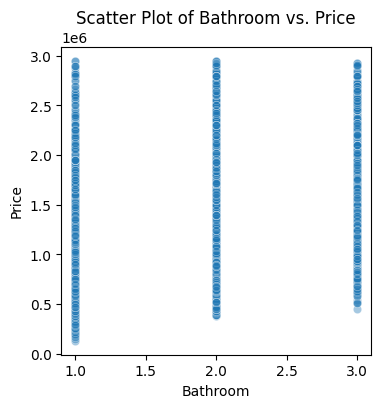

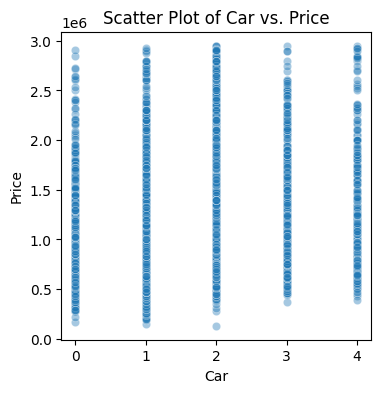

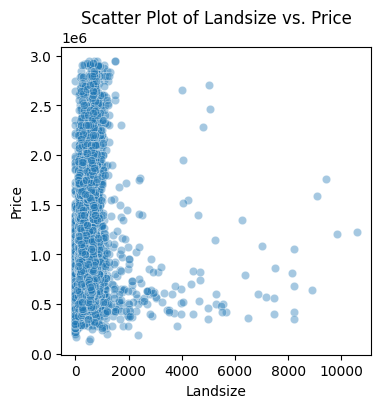

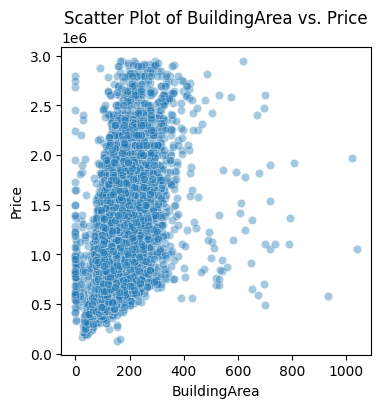

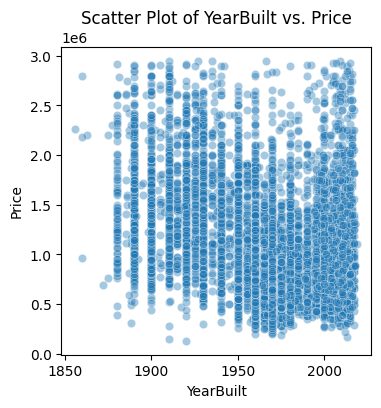

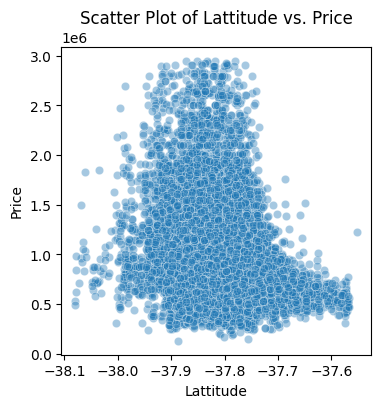

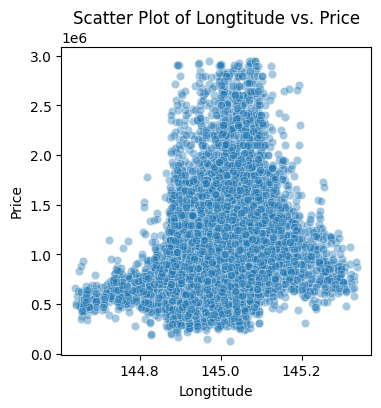

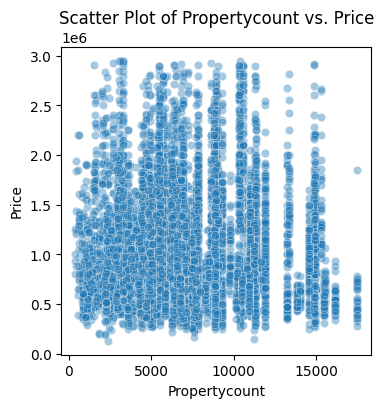

In [16]:
# Pair plot (price verisinin diğer nümerik veriler ile etkileşimi)
for column in numeric_columns_list:
    plt.figure(figsize=(4, 4))
    sns.scatterplot(x=column, y='Price', data=df_copy, alpha=0.4)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot of {column} vs. Price')

<ipython-input-17-812a488119c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


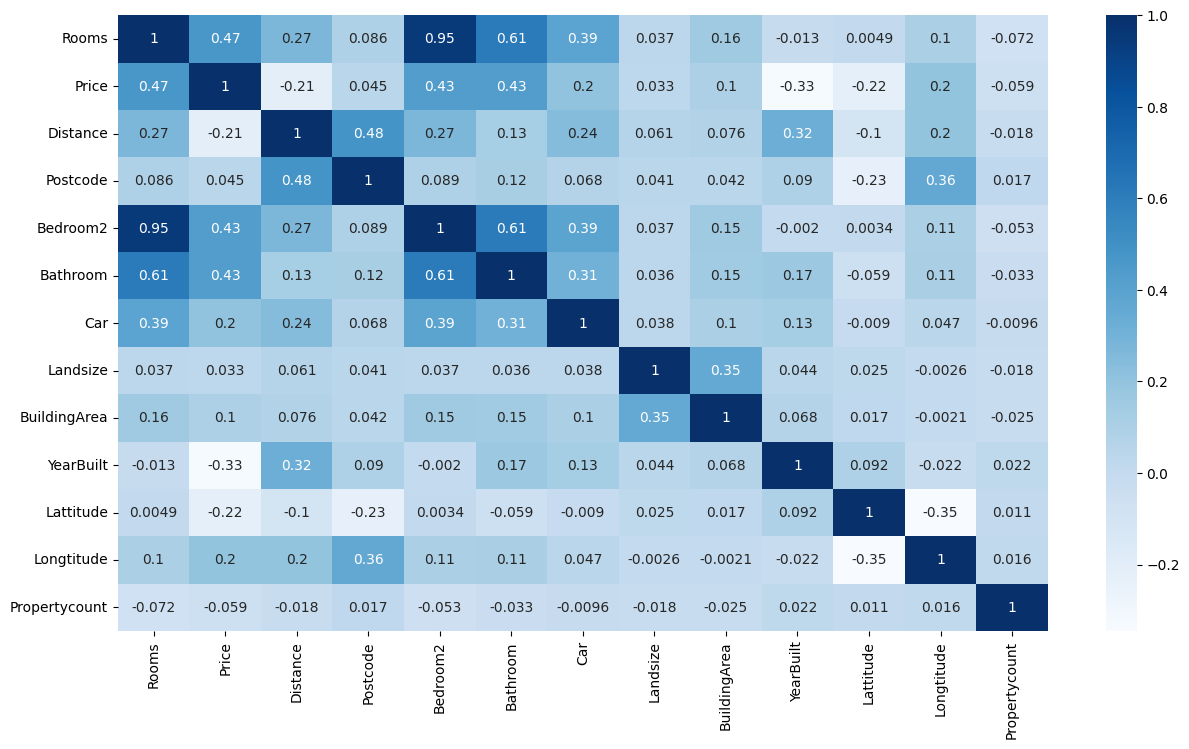

In [17]:
# korelasyon
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap="Blues", annot=True);

ONE_HOT_ENCODER

In [18]:
# ONE HOT ENCODE
# encode'u sadece kategorik sütunlara uygulamalıyız. !!tüm kolonlara değil!!
# fakat içinde string olan verilere de uygulamamız gerekmekte.
# o zaman hem string olan hem de kategorik olan sütunları verelim.

encode_columns = []
encode_columns.append(string_columns_list)
encode_columns.append(cat_cols)

def one_hot_encoder(dataframe, categorical_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_col, drop_first=drop_first)
    return dataframe

df_copy = one_hot_encoder(df_copy, string_columns_list, drop_first=True)
# df_copy = one_hot_encoder(df_copy, cat_cols, drop_first=True)
#normalde cat_cols ile de encode etmek iyi olabilirdi ama çalışmadı.

***MODEL EĞİTİMİ KISMI***

Değişkenlerin Belirlenmesi

In [19]:
# test ve eğitim setlerini oluşturuyoruz.
y = df_copy["Price"]
X = df_copy.drop("Price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# verilerimizin boyutlarını görelim.
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

# Kullanılacak modeller listesini oluşturduk.
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    }
}

Shape of x_train is (6591, 8749)
Shape of x_test is (1648, 8749)
Shape of y_train is (6591,)
Shape of y_test is (1648,)


Model Eğitimi ve Değerlendirme Metrikleri

In [20]:
for model_name, model_params in models.items():

    model = model_params['model']

    # Modeli eğit
    model.fit(X_train, y_train)

    # Tahminleri yap
    predictions = model.predict(X_test)

# Değerlendirme Metrikleri

    # MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_test, predictions)
    print(f'-----------{model_name}--------------')
    print(f'MAE: {mae}')

    # MSE (Mean Squared Error)
    mse = mean_squared_error(y_test, predictions)
    print(f'MSE: {mse}')

    # RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mse)
    print(f'RMSE: {rmse}')

    # R2 Score
    r2 = r2_score(y_test, predictions)
    print(f'R2 Score: {r2}\n------------------------------')

# bir veri setini ikinci kez aynı encode işlemine tabi tutarsan
# bir değişiklik olmuyormuş

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.285e+12, tolerance: 1.911e+11
  model = cd_fast.enet_coordinate_descent(


-----------Lasso--------------
MAE: 188678.31449920987
MSE: 74669517948.41072
RMSE: 273257.2376871484
R2 Score: 0.7456827531249439
------------------------------
-----------LinearRegression--------------
MAE: 243595.41722054614
MSE: 104225771928.73013
RMSE: 322840.1646770893
R2 Score: 0.6450169748162098
------------------------------
-----------Ridge--------------
MAE: 179666.7800040086
MSE: 64492692102.02614
RMSE: 253954.11416637088
R2 Score: 0.7803440500274843
------------------------------
-----------ElasticNet--------------
MAE: 224385.5678123462
MSE: 102314837944.12947
RMSE: 319866.9066098109
R2 Score: 0.651525433465419
------------------------------
-----------KNeighborsRegressor--------------
MAE: 215392.16990291263
MSE: 104428414201.84164
RMSE: 323153.8553101938
R2 Score: 0.6443267945871929
------------------------------
-----------RandomForestRegressor--------------
MAE: 149635.54398665047
MSE: 49869633243.493286
RMSE: 223315.0985569343
R2 Score: 0.8301487919351979
-----------

In [21]:
# model test
for model_name, model_params in models.items():
    model = model_params['model']
    print(f"\n--------{model_name}---------")
    try:
        print('Coefficients: {}'.format(str(model.coef_)))
    except AttributeError:
        print('Coefficients: Yoktur')
    try:
        print('Intercept:', model.intercept_)
    except AttributeError:
        print('Intercept: Yoktur')
    try:
        print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    except AttributeError:
        print('RMSE: Yoktur')
    try:
        print('R^2 test: {}\n----------------------------------------------'.format(model.score(X_test, y_test)))
    except AttributeError:
        print('R^2 test: Yoktur\n----------------------------------------------')


--------Lasso---------
Coefficients: [ 68945.10574227 -25841.81727632   2526.42828045 ... -81214.49653264
  11644.77041881  -1930.73373725]
Intercept: -58355609.00325942
RMSE: 273257.2376871484
R^2 test: 0.7456827531249439
----------------------------------------------

--------LinearRegression---------
Coefficients: [  71518.36829799   -6782.46481204     440.37087694 ... -120227.52088718
  146457.17366414 -109889.29411487]
Intercept: -73774391.07436444
RMSE: 322840.1646770893
R^2 test: 0.6450169748162098
----------------------------------------------

--------Ridge---------
Coefficients: [  72541.09056372  -29459.24679753     983.94372415 ...  -28692.11177324
   21731.98836269 -169525.64865521]
Intercept: -19186235.529551454
RMSE: 253954.11416637088
R^2 test: 0.7803440500274843
----------------------------------------------

--------ElasticNet---------
Coefficients: [ 64686.01266308 -34541.54121159   2631.14614185 ...  -1459.66785214
  15929.58695396  -5777.06082422]
Intercept: -1037